In [3]:
from scipy.misc import imresize, imsave, imread
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_l=imread('./data_ass_2/im0.ppm')
img_r=imread('./data_ass_2/im8.ppm')
print("Left ",img_l.shape,'\t',"Right ",img_r.shape)
img_left=img_l
img_right=img_r
img_right=img_right.astype(int)
img_left=img_left.astype(int)
X=img_right.shape[0]
Y=img_right.shape[1]

Left  (381, 430, 3) 	 Right  (381, 430, 3)


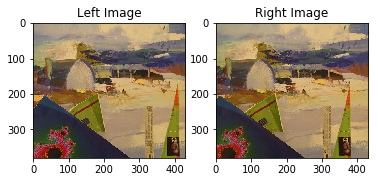

In [5]:
plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
plt.imshow(img_l)
plt.title("Left Image")

plt.subplot(1,2,2)
plt.imshow(img_r)
plt.title("Right Image")
plt.show()

In [6]:
def find_nearest_neighbour(pixel_array, rgb_pixel):
    idx=np.abs(list(np.sum(i) for i in (np.square(pixel_array- rgb_pixel)))).argmin()
    return idx
def find_alt_nearest_neighbour(pixel_array, rgb_pixel):
    idx=np.abs(list(np.sum(i) for i in (np.abs(pixel_array- rgb_pixel)))).argmin()
    return idx

In [7]:
D=np.zeros(shape=(X,Y-40), dtype=int)
for i in range(X):
    for j in range(Y-40):
        match_index=find_nearest_neighbour(img_left[i,j:j+40], img_right[i,j])
        D[i,j]=int(match_index)


In [8]:
D_2=np.zeros(shape=(X,Y-40), dtype=int)
for i in range(X):
    for j in range(Y-40):
        match_index=find_alt_nearest_neighbour(img_left[i,j:j+40], img_right[i,j])
        D_2[i,j]=int(match_index)

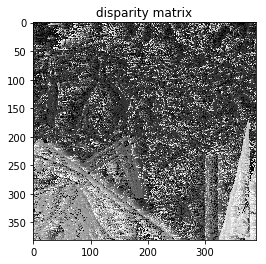

In [9]:
disparity_mat=D
plt.imshow(disparity_mat,'gray')
plt.title("disparity matrix")
plt.show()

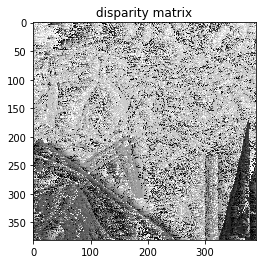

In [10]:
plt.imshow(disparity_mat,'gray_r')
plt.title("disparity matrix")
plt.show()

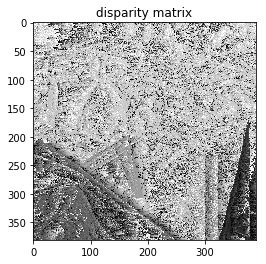

In [11]:
disparity_mat=D_2
plt.imshow(disparity_mat,'gray_r')
plt.title("disparity matrix")
plt.show()

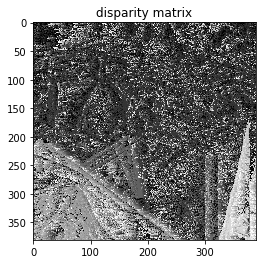

In [12]:
plt.imshow(disparity_mat,'gray')
plt.title("disparity matrix")
plt.show()

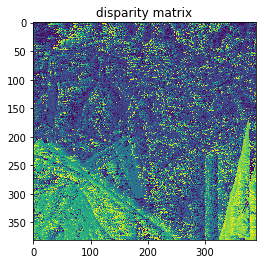

In [13]:
disparity_mat=D
plt.imshow(disparity_mat)
plt.title("disparity matrix")
plt.show()

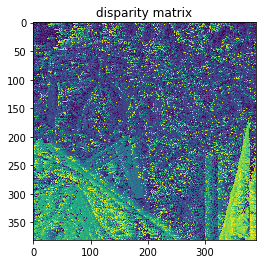

In [14]:
disparity_mat=D_2
plt.imshow(disparity_mat)
plt.title("disparity matrix")
plt.show()

In [15]:
mod_D=D.reshape(D.shape[0]*D.shape[1],1)
print("Final shape :", mod_D.shape)

Final shape : (148590, 1)


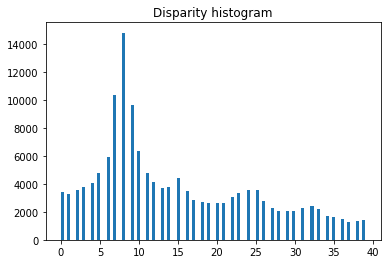

In [16]:
plt.hist(mod_D,bins=100)
plt.title("Disparity histogram")
plt.show()

From the histogram, I guess there are 5 clusters

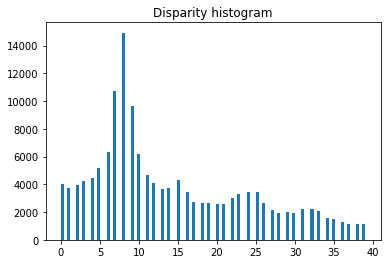

In [17]:
mod_D=D_2.reshape(D.shape[0]*D.shape[1],1)
plt.hist(mod_D,bins=100)
plt.title("Disparity histogram")
plt.show()

## Question 3

In [18]:
print(D[0:10,0:10])

[[ 2  7  0  2  4  3  2  1 14 10]
 [ 9  4  3  2  5  4  3  2  1  0]
 [ 3  8  7  6  3  3  1  2  0 13]
 [ 7 14  3  5  3  3  2  0  0 12]
 [ 2  1  0 12 12 10  4  8  7 12]
 [ 8  9  8  8 11 10  9  2  3  6]
 [ 8  7  7  5  4  7  2  1  7  6]
 [ 8  7  6  2 12  0  2 22  8  3]
 [ 5  9  8  7 22  0  4  4  3  4]
 [ 5  9  9  7  1 11 10  9 14  7]]


In [19]:
####Since we assumed 5 clusters
####Assuming each cluster of ssame size calculating the ranges
N=5 # number of clusters
cluster_value_Size=int(40/N)

In [21]:
cluster_means=[]
for i in range(N):
    #clusterValueRanges.append(i+cluster_value_Size)
    _mean = np.mean(D[(D < i + cluster_value_Size) & (D >= i)])
    D[(D < i + cluster_value_Size) & (D >= i)] = _mean
    print(_mean)

4.33663391604
5.09869687546
5.60701219991
5.45240985362
5.38594850279


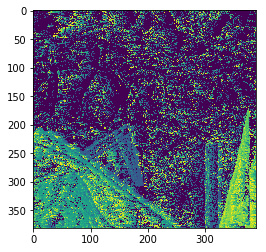

In [23]:
plt.imshow(D)
plt.show()

## GMM

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from random import uniform

data=D

In [ ]:
def prob_data_cluster(data, num_mix, mu, sigma):
    p = []
    for i in range(num_mix):
        p.append([])
        for j in range(len(data)):
            p[i].append([])
            power = -1*((data[j]-mu[i])**2)/(2*sigma[i]**2)
            p[i][j]=(math.exp(power)/(math.sqrt(2 *math.pi)*sigma[i]))
    return p

In [ ]:
def prob_cluster_data(p_data_cluster, pi):
    p=[]
    n=[]
    den = []
    for i in range(len(p_data_cluster[0])):
        den_1 = 0
        for j in range(len(p_data_cluster)):
            den_1 = float(den_1) + (float(pi[j])*float(p_data_cluster[j][i]))
        den.append(den_1)
    for i in range(len(p_data_cluster)):
        p.append([])
        n1 = 0
        for j in range(len(p_data_cluster[i])):
            p[i].append([])
            p[i][j] = (float(p_data_cluster[i][j])*float(pi[i]))/float(den[j])
            n1 = n1 + p[i][j]
        n.append(n1)
    return p,n